In [1]:
# # requests is one of the best libraries on python for capturing web site data
# !pip install imageio
# !pip install PyOpenGL PyOpenGL_accelerate
# #import PyOpenGL
# !pip install visvis
# import visvis as vv
# import imageio
import matplotlib.pyplot as plt
import requests
import numpy as np
import keras
#from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.layers.convolutional import Conv3D, MaxPooling3D
import pandas as pd
from keras import backend as K
from keras.models import Sequential
import PIL.Image
#import visvis as vv
import cv2

page = requests.get("http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04194289")
print(page.content)

# BeautifulSoup is an HTML parsing library
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')#puts the content of that page into the soup variable
#print(soup)
#print(soup.prettify())

Using TensorFlow backend.


b"http://static.flickr.com/85/233578996_8f74463083.jpg\r\nhttp://farm3.static.flickr.com/2317/2472759369_f4cc1ff8a0.jpg\r\nhttp://static.flickr.com/2173/2071797511_200e3e4d2e.jpg\r\nhttp://farm2.static.flickr.com/1019/534041866_3aa182311c.jpg\r\nhttp://static.flickr.com/88/231940102_7beb5ecf3e.jpg\r\nhttp://farm4.static.flickr.com/3138/2724596903_d74dd64821.jpg\r\nhttp://static.flickr.com/174/453920264_9406e9972c.jpg\r\nhttp://farm2.static.flickr.com/1419/1408865234_caf87d02e3.jpg\r\nhttp://farm1.static.flickr.com/147/423542865_c091691a6b.jpg\r\nhttp://farm3.static.flickr.com/2074/2367492616_272bf6af6a.jpg\r\nhttp://farm2.static.flickr.com/1081/1365111200_8d105d9fb1.jpg\r\nhttp://farm3.static.flickr.com/2269/2348294071_94fc609f4a.jpg\r\nhttp://static.flickr.com/1016/1443997081_b5eb875055.jpg\r\nhttp://www.walleniuslines.com/img_upload/maersk_teal.jpg\r\nhttp://www.fondear.org/infonautic/Barco/Barco_Navegando/Contenedores_Peligro/sea_container_ship2.jpg\r\nhttp://static.flickr.com/198/4

In [2]:
str_soup=str(soup)#convert soup to string so it can be split
type(str_soup)
split_urls=str_soup.split('\r\n')#split so each url is a different possition on a list
print(len(split_urls))

1262


In [0]:
"""import re
reg_ex=r'(http:\/\/.+)\n'#regular expression to recognize each url
links = re.compile(reg_ex, soup)
print(links)"""

In [0]:
def parse_sublink(link):
    page = requests.get(link)
    soup = BeautifulSoup(page.content, 'html.parser')#gets the page that has the image for the link
    
    #content = requests.get(link).content
    # get soup
    
    #soup = BeautifulSoup(page.content,'html.parser')
    # find the tag : <img ... >
    #chipset_element = soup.find(string="Chipset")
    #found_image = soup.findAll('img')
    # print out image urls
    
    #for image_tag in image_tags:
     # print(image_tag.get('src'))
    
    # try/except prevents failure during error conditions
    # try happens first, if there is an error, execution ends, and runs
    # "except" afterward.
    try:
        found_image = soup.findAll('img')
        #print('FOUND AN IMAGE',type(found_image))
    except:
        found_image = None
    
    return found_image

In [113]:
print(split_urls[13])#this one creates an error, fixed with try: except:

http://www.walleniuslines.com/img_upload/maersk_teal.jpg


In [0]:
import os
import urllib.request
import requests
for progress,url in enumerate(split_urls):#Print all the images
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not url == None:
      try:
        I = imageio.imread(url)
        plt.rcParams["axes.grid"] = False
        plt.imshow(I)
      except:
        None

0
20
40


In [0]:
actual_images=[]
for progress,url in enumerate(split_urls):#store all the images on a list
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not url == None:
      try:
        I = imageio.imread(url)
        actual_images.append(I)
      except:
        None

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200


#Test with just 50 images append to a List

In [53]:
#Test with just 50 images
actual_images=[]
for progress in range(50):#store all the images on a list
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        url = split_urls[progress]
        I = imageio.imread(url)
        if (len(I.shape))==3: #check if the image has width, length and channels, as I found some withouth channels
          actual_images.append(I)
      except:
        None

#plt.imshow(actual_images[2])
#type(actual_images[0])

0
20
40


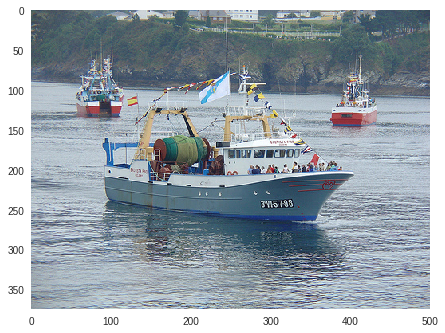

In [58]:
I=actual_images[0]#check the images are stored correctly on the list
plt.rcParams["axes.grid"] = False
plt.imshow(I)

#Save the images on a local directory 

In [64]:
for index, img in enumerate(actual_images):
  if index == 0:
    print(img)
#     im = PIL.Image.open(img)
#     im.show()

[[[ 61  93  92]
  [ 73  90  98]
  [ 70  90  99]
  ...
  [ 52  71  85]
  [ 54  70  83]
  [ 58  67  82]]

 [[ 73  99  88]
  [ 75  96  91]
  [ 80 105  99]
  ...
  [ 52  69  85]
  [ 54  67  84]
  [ 57  65  84]]

 [[ 84  96  94]
  [ 81  99  99]
  [ 73 100  95]
  ...
  [ 52  70  92]
  [ 50  68  88]
  [ 50  68  88]]

 ...

 [[130 147 155]
  [130 148 158]
  [142 150 161]
  ...
  [150 157 165]
  [150 157 163]
  [150 157 163]]

 [[139 136 145]
  [141 143 156]
  [137 140 157]
  ...
  [169 178 185]
  [165 174 179]
  [162 171 176]]

 [[136 161 165]
  [138 162 164]
  [145 154 159]
  ...
  [168 178 188]
  [165 175 185]
  [162 172 182]]]


In [11]:
I = url_to_image(split_urls[0])
if (len(I.shape))==3: #check if the image has width, length and channels, as I found some withouth channels
  save_path = 'img'+str(progress)+'.jpg'
  if K.image_data_format() == 'channels_first':
    correct_format_I = I.reshape(I.shape, 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
  else:
    correct_format_I = I.reshape(I.shape, img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)
    cv2.imwrite(save_path,correct_format_I)


(375, 500, 3)

#try using CV2 correct the image shape, format, and store on the file system

In [0]:
#check if all the images where stored on the files system
!mkdir /content/Train #create the Train folder
!mkdir /content/Train/ships #create the ships folder
!ls /content/Train/ships #list the files inside ships

In [4]:
# dimension to convert the images
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
import urllib
# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.request.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image


#Test with just 50 images and cv2
actual_images=[]
for progress in range(21):#store all the images on a list
    # Print out progress whenever progress is a multiple of 20 so we can follow the
    # (relatively slow) progress
    if(progress%20==0):
        print(progress)
    if not split_urls[progress] == None:
      try:
        I = url_to_image(split_urls[progress])
        if (len(I.shape))==3: #check if the image has width, length and channels, as I found some withouth channel
          save_path = '/content/Train/ships/img'+str(progress)+'.jpg'
#           if K.image_data_format() == 'channels_first':
#             correct_format_I = I.reshape(I.shape[0], 3, img_rows, img_cols)
#             input_shape = (3, img_rows, img_cols)
#           else:
#             correct_format_I = I.reshape(I.shape[0], img_rows, img_cols, 3)
#             input_shape = (img_rows, img_cols, 3)
          cv2.imwrite(save_path,I)

      except:
        None
        
!ls /content/Train/ships #list the files inside ships        

0
20
img0.jpg   img12.jpg  img16.jpg  img19.jpg  img2.jpg  img5.jpg	img8.jpg
img10.jpg  img14.jpg  img17.jpg  img1.jpg   img3.jpg  img6.jpg	img9.jpg
img11.jpg  img15.jpg  img18.jpg  img20.jpg  img4.jpg  img7.jpg


#Train a model using the images on the file system

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen  = ImageDataGenerator()
    
train_generator = train_datagen.flow_from_directory(
        '/content/Train/ships',
        target_size=(img_rows, img_cols),#The target_size is the size of your input images,every image will be resized to this size
        batch_size=32,
        class_mode='binary')

model2 = Sequential()
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
#--------------------------
model2.add(Conv2D(4, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) 
model2.add(Conv2D(8, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
#--------------------------
model2.add(Flatten())
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(2, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model2.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
         )

Found 0 images belonging to 0 classes.
Epoch 1/50
